# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [27]:
import requests
from bs4 import BeautifulSoup

import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

import warnings
warnings.filterwarnings("ignore")

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Check in was so slow, no se..."
1,✅ Trip Verified | My review relates to the ap...
2,✅ Trip Verified | This was my first time flyin...
3,✅ Trip Verified | Lots of cancellations and d...
4,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...


In [4]:
df.to_csv("C://Users//Ifelo//Downloads//data//BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,"✅ Trip Verified | Check in was so slow, no se..."
1,✅ Trip Verified | My review relates to the ap...
2,✅ Trip Verified | This was my first time flyin...
3,✅ Trip Verified | Lots of cancellations and d...
4,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
...,...
995,✅ Trip Verified | Los Angeles to London Heath...
996,✅ Trip Verified | Hamburg to Abu Dhabi via Lo...
997,✅ Trip Verified | Overnight club world flight...
998,✅ Trip Verified | London Heathrow to Vancouve...


In [6]:
for i in range(0, len(df)):
    try:
        df.loc[i, 'reviews'] = df.loc[i, 'reviews'].split('|')[1]
    except:
        pass

In [7]:
df

,reviews
0,"Check in was so slow, no self check in and b..."
1,My review relates to the appalling experienc...
2,This was my first time flying with BA & I was...
3,Lots of cancellations and delays and no one ...
4,BA 242 on the 6/2/23. Boarding was delayed du...
...,...
995,Los Angeles to London Heathrow return. Outb...
996,Hamburg to Abu Dhabi via London. Hamburg to ...
997,Overnight club world flight from Rio to Lond...
998,London Heathrow to Vancouver. The 747 on thi...


In [28]:
#Topic Modelling
# preprocess text data
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            result.append(token)
    return result

# apply preprocessing to each text string in the dataframe
texts = df['reviews'].apply(preprocess)

# create dictionary of words and their integer ids
dictionary = corpora.Dictionary(texts)

# convert texts to bag-of-words representation
corpus = [dictionary.doc2bow(text) for text in texts]

# perform topic modeling using LDA (Latent Dirichlet Allocation)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10,
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# print top words for each topic
for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print(f"Topic {i+1}: {[word for word, _ in topic]}")

Topic 1: ['soft', 'dropped', 'operated', 'piece', 'biscuits', 'content', 'plate', 'pleasantly', 'edgy', 'secure']
Topic 2: ['good', 'club', 'food', 'lounge', 'service', 'world', 'experience', 'europe', 'better', 'cabin']
Topic 3: ['seat', 'class', 'seats', 'business', 'economy', 'premium', 'paid', 'middle', 'route', 'fare']
Topic 4: ['comfort', 'complaints', 'added', 'menus', 'true', 'buenos', 'aires', 'qatar', 'toothpaste', 'towels']
Topic 5: ['gatwick', 'card', 'bags', 'dublin', 'desk', 'gone', 'wonderful', 'earlier', 'toronto', 'destination']
Topic 6: ['flight', 'london', 'british', 'airways', 'service', 'hours', 'airline', 'customer', 'told', 'flights']
Topic 7: ['flight', 'crew', 'cabin', 'food', 'london', 'service', 'aircraft', 'great', 'meal', 'seat']
Topic 8: ['special', 'johannesburg', 'writing', 'spending', 'bins', 'solution', 'heart', 'comair', 'amex', 'durban']
Topic 9: ['flight', 'check', 'boarding', 'time', 'heathrow', 'plane', 'staff', 'gate', 'minutes', 'nice']
Topic 10

In [8]:
# extract text data from the dataframe
text = " ".join(df['reviews'])

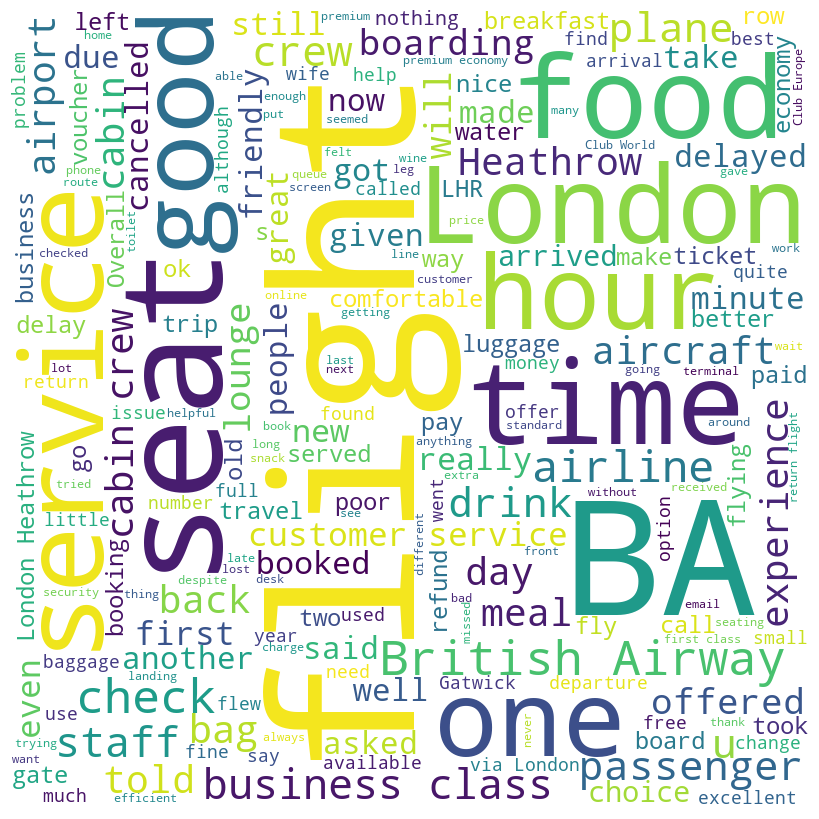

In [9]:
# create a word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, max_words=200).generate(text)

# plot the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [23]:
#Sentimental analysis
# create a TextBlob object
blob = TextBlob(text)

# determine the sentiment polarity (-1 to 1)
polarity = blob.sentiment.polarity

# determine sentiment polarity (-1 to 1)
sentiment_polarity = blob.sentiment.polarity

# determine sentiment subjectivity (0 to 1)
sentiment_subjectivity = blob.sentiment.subjectivity

# classify sentiment as positive, negative, or neutral
if sentiment_polarity > 0:
    sentiment = "positive"
elif sentiment_polarity < 0:
    sentiment = "negative"
else:
    sentiment = "neutral"

print(f"Sentiment polarity: {sentiment_polarity}")
print(f"Sentiment subjectivity: {sentiment_subjectivity}")
print(f"Sentiment: {sentiment}")

Sentiment polarity: 0.09767994765778032
Sentiment subjectivity: 0.48708572213193857
Sentiment: positive


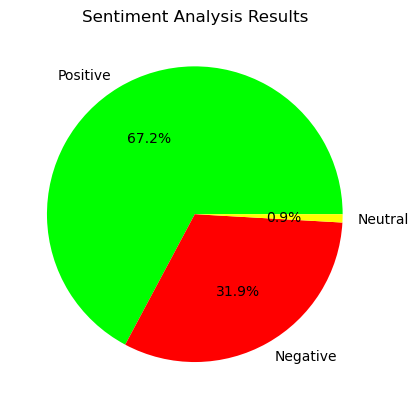

In [26]:
# create empty lists for sentiment labels and counts
sentiments = []
counts = []

# loop through rows of dataframe and analyze sentiment of each text string
for i, row in df.iterrows():
    text = row['reviews']
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        sentiment = "positive"
    elif sentiment_polarity < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    sentiments.append(sentiment)

# count the number of occurrences of each sentiment label
counts = [sentiments.count('positive'), sentiments.count('negative'), sentiments.count('neutral')]

# create pie chart
labels = ['Positive', 'Negative', 'Neutral']
colors = ['#00ff00', '#ff0000', '#ffff00']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Sentiment Analysis Results')
plt.show()
